In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import pandas as pd 
import numpy as np
from fastai import *
from fastai.vision import *
from matplotlib import pyplot as plt
from google.colab import drive


In [0]:
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
file_name = Path('/content/gdrive/My Drive/cars')
categories = os.listdir(file_name)
print(categories)

['cars_damaged', 'cars_undamaged']


In [0]:
np.random.seed(42)
data = (ImageList.from_folder(file_name)
       .split_by_rand_pct(0.2)
       .label_from_folder()
       .transform(get_transforms(do_flip = True, flip_vert=False, max_lighting=0.2, max_zoom=1.05, max_warp=0.2), size=256)
       .databunch(bs=16)
       .normalize(imagenet_stats))

In [0]:
print(data.c)
print(data.classes)

2
['cars_damaged', 'cars_undamaged']


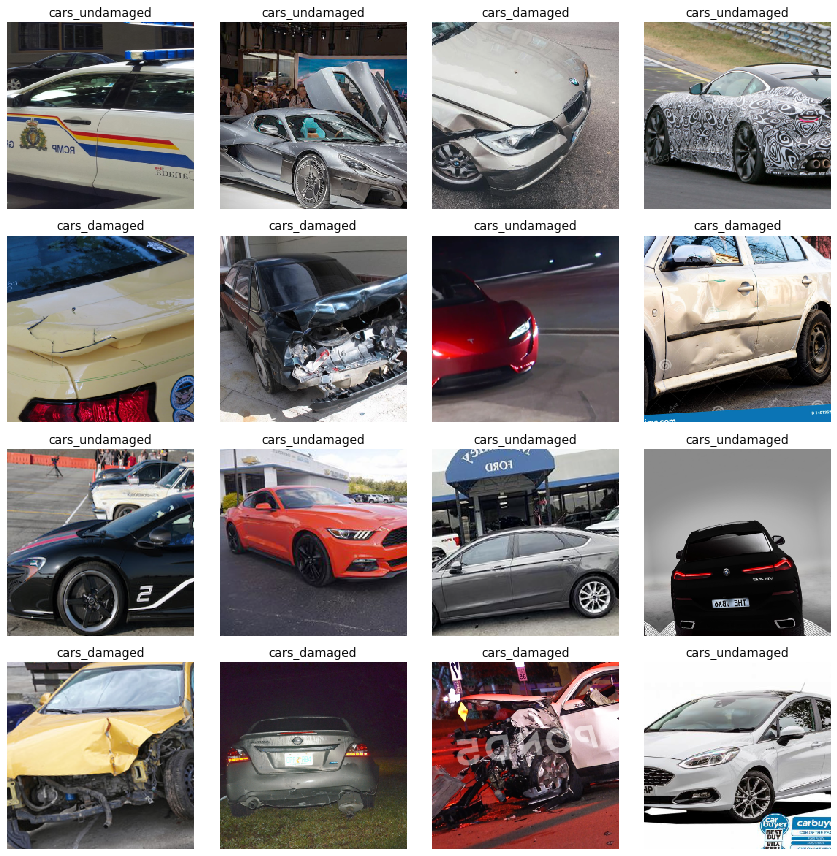

In [0]:
data.show_batch(rows=4, figsize=(12,12))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 195MB/s]


Initially I started with resnet50, but the model was easily overfit. So, here I am using resnet34

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Min numerical gradient: 2.75E-06
Min loss divided by 10: 3.31E-03


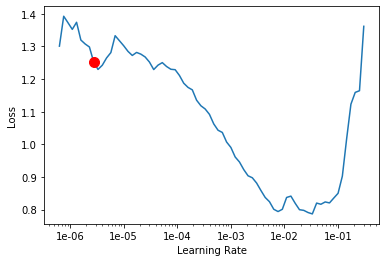

In [0]:
# learning rate optimization
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(15, slice(5e-04))

epoch,train_loss,valid_loss,accuracy,time
0,1.063403,0.549158,0.759740,00:41
1,0.737628,0.277345,0.902597,00:41
2,0.484560,0.231764,0.922078,00:40
3,0.365718,0.227852,0.915584,00:40
4,0.314416,0.207811,0.935065,00:40
5,0.286980,0.200145,0.928571,00:41
6,0.248770,0.203992,0.935065,00:41
7,0.200699,0.192403,0.928571,00:41
8,0.182022,0.212699,0.928571,00:41
9,0.185033,0.180089,0.948052,00:40


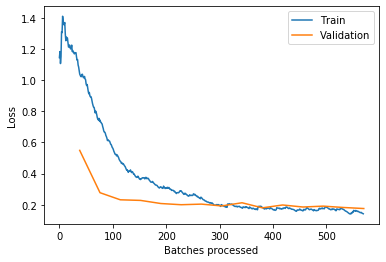

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage_1')

In [0]:
learn = learn.load('stage_1')

In [0]:
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
Failed to compute the gradients, there might not be enough points.


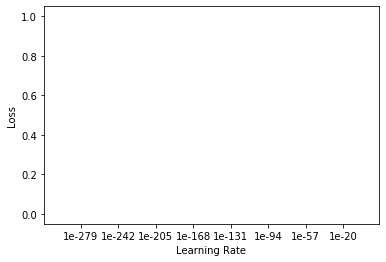

In [0]:
learn.lr_find()
learn.recorder.plot(suggestion=True)

In [0]:
learn.fit_one_cycle(10, slice(1e-6, 1e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.139429,0.179469,0.948052,00:42
1,0.144258,0.171021,0.948052,00:41
2,0.147072,0.169364,0.948052,00:41
3,0.134576,0.186939,0.941558,00:42
4,0.140087,0.173927,0.948052,00:42
5,0.129906,0.178128,0.948052,00:42
6,0.116707,0.177510,0.948052,00:42
7,0.106357,0.178064,0.948052,00:42
8,0.127328,0.186272,0.948052,00:42
9,0.120018,0.168238,0.948052,00:42


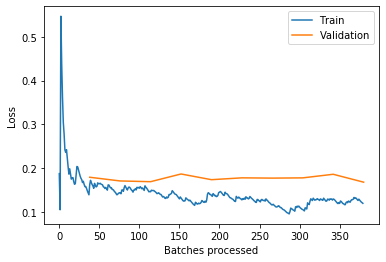

In [0]:
learn.recorder.plot_losses()

In [0]:
learn.save('stage_2')

In [0]:
learn.export()

In [0]:
learn.load('stage_2');

In [0]:
train_interp = ClassificationInterpretation.from_learner(learn,ds_type=DatasetType.Train)
valid_interp = ClassificationInterpretation.from_learner(learn)

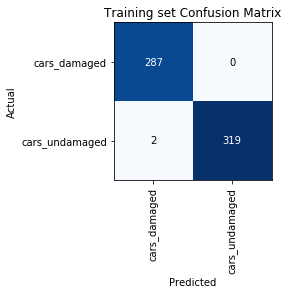

In [0]:
# Plot Training Set Confusion Matrix
train_interp.plot_confusion_matrix(title="Training set Confusion Matrix")

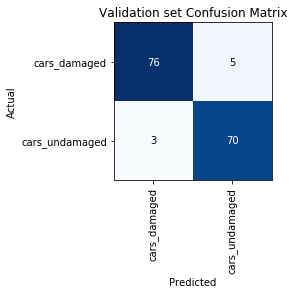

In [0]:
# Plot Validation Set Confusion Matrix
valid_interp.plot_confusion_matrix(title="Validation set Confusion Matrix")


In [0]:
losses,idxs = valid_interp.top_losses()

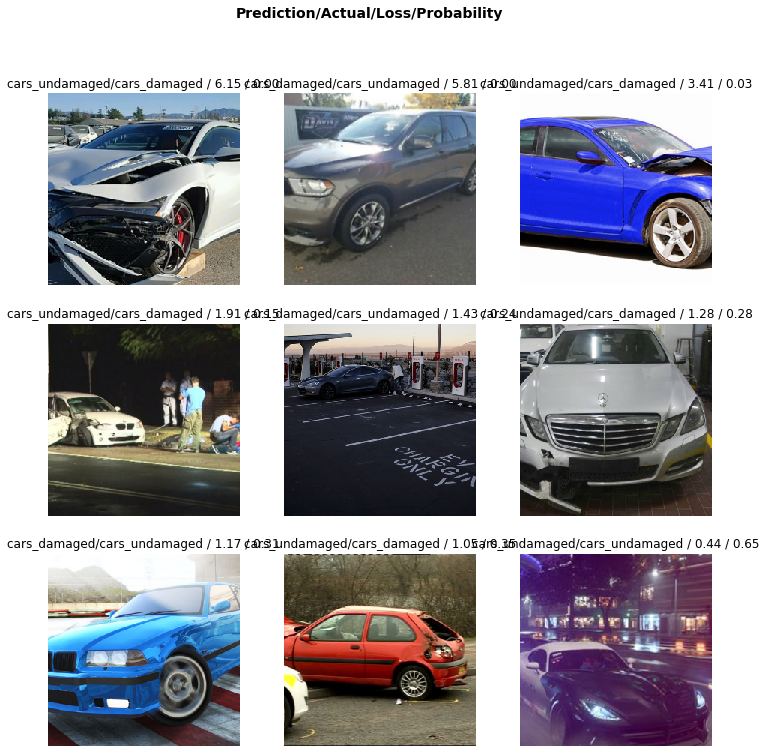

In [0]:
valid_interp.plot_top_losses(9)

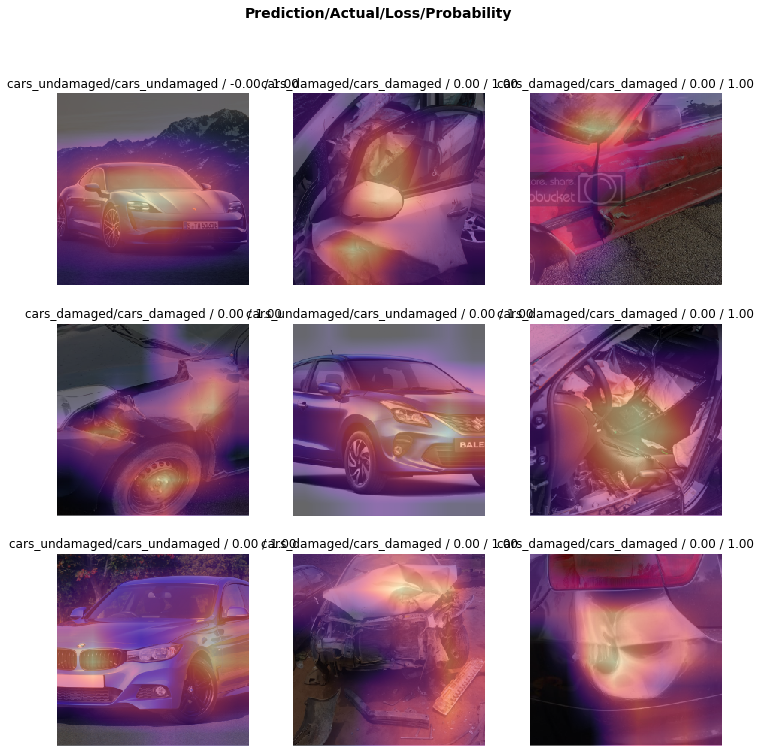

In [0]:
valid_interp.plot_top_losses(9, figsize=(12,12), largest=False, heatmap=True)